# Country Club Query
Run in SQL results pasted here.


### Question 1:
/* Q1: Some of the facilities charge a fee to members, but some do not.
Write a SQL query to produce a list of the names of the facilities that do. */


SELECT * FROM `Facilities` WHERE membercost>0

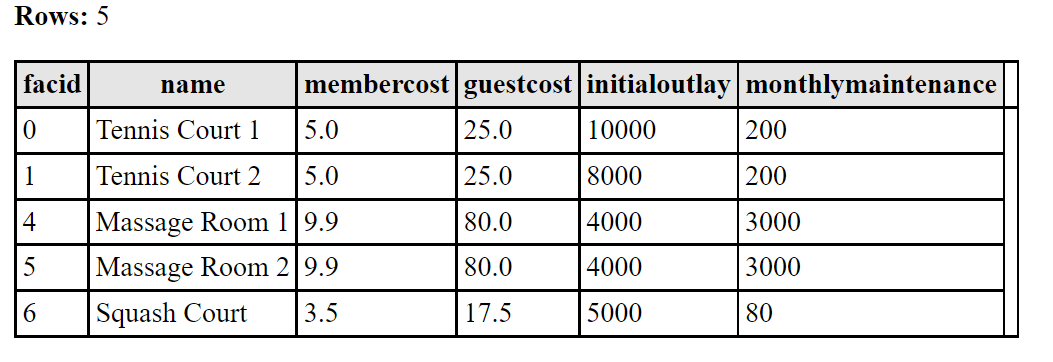


### Question 2:
/* Q2: How many facilities do not charge a fee to members? */


SELECT COUNT(*) FROM `Facilities` WHERE membercost=0
Answer: 4

### Question 3

/* Q3: Write an SQL query to show a list of facilities that charge a fee to members,
where the fee is less than 20% of the facility's monthly maintenance cost.
Return the facid, facility name, member cost, and monthly maintenance of the
facilities in question. */

SELECT facid, name, membercost, monthlymaintenance FROM `Facilities` WHERE membercost<=.2*monthlymaintenance

Answer:
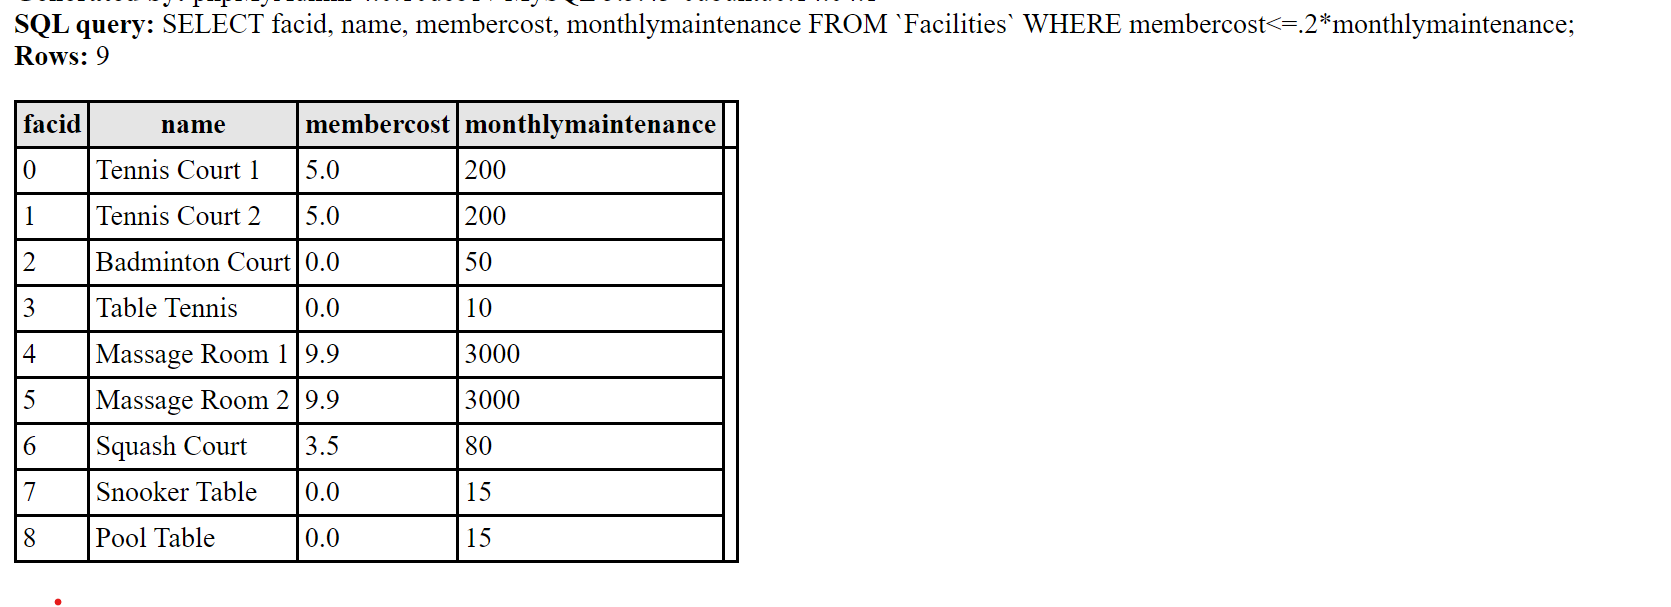

## Question 4

Q4: Write an SQL query to retrieve the details of facilities with ID 1 and 5.
Try writing the query without using the OR operator.


SELECT * 
FROM  `Facilities` 
WHERE  `initialoutlay` <=8000
AND  `membercost` >=5
AND  `facid` !=4

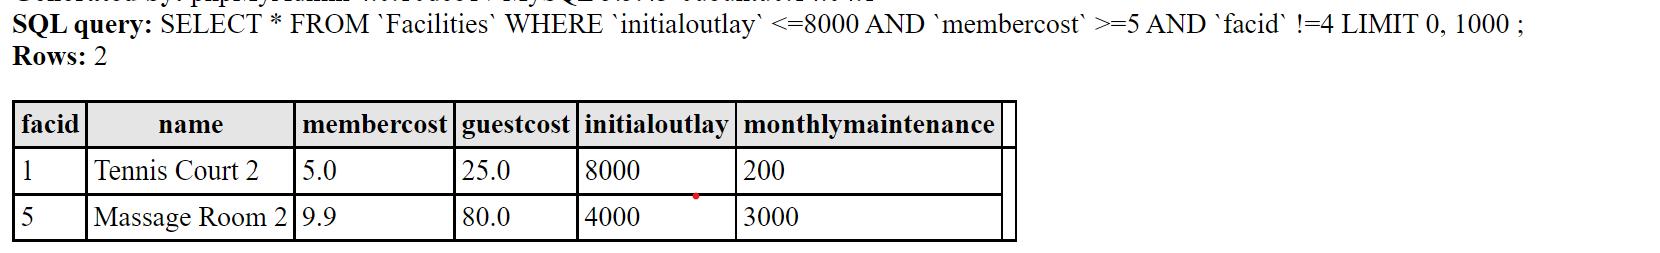

# Question 5
Q5: Produce a list of facilities, with each labelled as
'cheap' or 'expensive', depending on if their monthly maintenance cost is
more than $100. Return the name and monthly maintenance of the facilities
in question. 


SELECT 
  `name`,
  `monthlymaintenance`,
CASE
    WHEN `monthlymaintenance` <= 100 THEN 'cheap'
    WHEN `monthlymaintenance` > 100 THEN 'expensive'
END AS cost_label
FROM `Facilities` 
  ORDER BY cost_label
  
  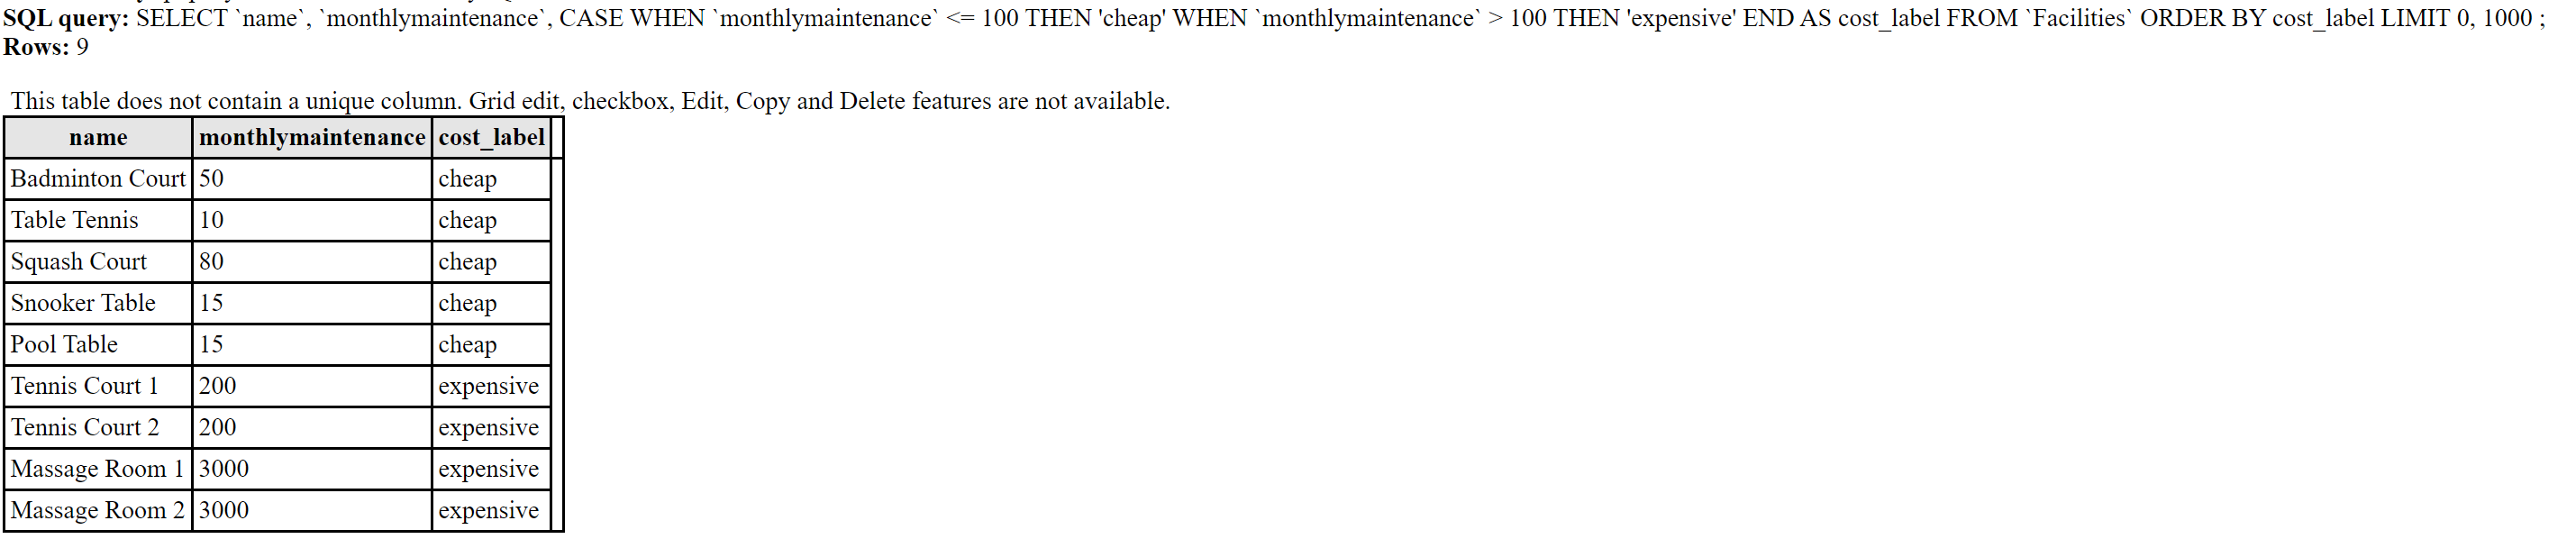

# Question 6
Q6:  
/* Q6: You'd like to get the first and last name of the last member(s)
who signed up. Try not to use the LIMIT clause for your solution. */

SELECT
  `surname`,
  `firstname`
FROM Members
ORDER BY `joindate` DESC
LIMIT 1

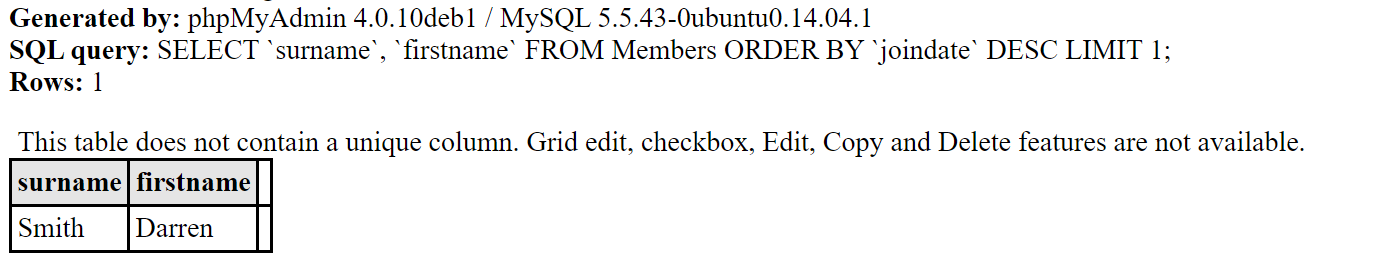

## Question 7

/* Q7: Produce a list of all members who have used a tennis court.
Include in your output the name of the court, and the name of the member
formatted as a single column. Ensure no duplicate data, and order by
the member name. */



In [ ]:
SELECT f.name, CONCAT(m.firstname, ' ', m.surname) AS Members_Name 
FROM `Facilities` AS f
	INNER JOIN `Bookings` AS b
		ON b.facid = f.facid
	INNER JOIN `Members` AS m
		ON b.memid = m.memid
WHERE f.name IN ('Tennis Court 1', 'Tennis Court 2')
GROUP BY f.name, Members_Name
ORDER BY Members_Name

## Question 8


/* Q8: Produce a list of bookings on the day of 2012-09-14 which
will cost the member (or guest) more than $30. Remember that guests have
different costs to members (the listed costs are per half-hour 'slot'), and
the guest user's ID is always 0. Include in your output the name of the
facility, the name of the member formatted as a single column, and the cost.
Order by descending cost, and do not use any subqueries. */




In [ ]:
/* Query to select cost (> $30) incurred by Guests*/
SELECT f.name, CONCAT(m.firstname, ' ', m.surname) AS Member_Name, 
f.guestcost*b.slots as cost
FROM `Members` AS m
	INNER JOIN `Bookings` AS b
		ON m.memid = b.memid
	INNER JOIN `Facilities` as f
		ON f.facid = b.facid
WHERE m.memid = 0 AND f.guestcost*b.slots > 30 AND date(b.starttime) = '2012-09-14'

UNION

/* Second query to get cost (>30$) incurred by members*/
SELECT f.name, CONCAT(m.firstname, ' ', m.surname) AS Member_Name, 
f.membercost*b.slots
FROM `Members` AS m
	INNER JOIN `Bookings` AS b
		ON m.memid = b.memid
	INNER JOIN `Facilities` as f
		ON f.facid = b.facid
WHERE m.memid != 0 AND f.membercost*b.slots > 30 AND date(b.starttime) = '2012-09-14'
ORDER BY cost DESC

## Question 9


/* Q9: This time, produce the same result as in Q8, but using a subquery. */

In [ ]:
SELECT subquery.name, subquery.Members_Name, subquery.cost
FROM (

SELECT f.name, CONCAT( m.firstname, ' ', m.surname ) AS Members_Name,
CASE WHEN m.memid =0
THEN f.guestcost * b.slots
ELSE f.membercost * b.slots
END AS cost
FROM `Members` AS m
INNER JOIN `Bookings` AS b ON m.memid = b.memid
INNER JOIN `Facilities` AS f ON f.facid = b.facid
WHERE DATE(b.starttime) = '2012-09-14') AS subquery
WHERE subquery.cost >30
ORDER BY cost DESC

## Question 10
/* Q10: Produce a list of facilities with a total revenue less than 1000.
The output of facility name and total revenue, sorted by revenue. Remember
that there's a different cost for guests and members! */

In [13]:
def Question11(conn):
    """
    Query all rows in the tasks table
    :param conn: the Connection object
    :return:
    """
    cur = conn.cursor()
    
    query10 = """
        SELECT subquery.name, subquery.revenue
        FROM
            (SELECT f.name, 
             SUM( CASE WHEN b.memid =0 THEN b.slots * f.guestcost
                      ELSE b.slots * f.membercost END ) AS revenue
             FROM `Facilities` AS f
                 INNER JOIN `Bookings` AS b 
                 ON f.facid = b.facid
        GROUP BY f.name) AS subquery

        WHERE subquery.revenue < 1000
        ORDER BY subquery.revenue
        """
    cur.execute(query10)
 
    rows = cur.fetchall()
 
    for row in rows:
        print(row)


def main_Q10():
    database = "sqlite_db_pythonsqlite.db" 
    # create a database connection
    conn = create_connection(database)
    with conn: 
        print("Q10: List of facilities with a total revenue less than 1000.")
        Question11(conn)
 
 
if __name__ == '__main__':
    main_Q10()

2.6.0
Q10: List of facilities with a total revenue less than 1000.
('Table Tennis', 180)
('Snooker Table', 240)
('Pool Table', 270)


# Question 11 
/* Q11: Produce a report of members and who recommended them in alphabetic surname,firstname order */


In [11]:
def Question11(conn):
    """
    Query all rows in the tasks table
    :param conn: the Connection object
    :return:
    """
    cur = conn.cursor()
    
    query11 = """
        SELECT m.memid, m.surname, m.firstname, (r.firstname || ' ' || r.surname) AS recommender
        FROM `Members` AS m
        INNER JOIN `Members` AS r
        ON m.recommendedby = r.memid
        WHERE m.memid != 0
        ORDER BY m.surname, m.firstname
        """
    cur.execute(query11)
 
    rows = cur.fetchall()
 
    for row in rows:
        print(row)


def main_Q11():
    database = "sqlite_db_pythonsqlite.db" 
    # create a database connection
    conn = create_connection(database)
    with conn: 
        print("Q11: Report of members and who recommended them in alphabetic surname,firstname order")
        Question11(conn)
 
 
if __name__ == '__main__':
    main_Q11()

2.6.0
Q11: Report of members and who recommended them in alphabetic surname,firstname order
(15, 'Bader', 'Florence', 'Ponder Stibbons')
(12, 'Baker', 'Anne', 'Ponder Stibbons')
(16, 'Baker', 'Timothy', 'Jemima Farrell')
(8, 'Boothe', 'Tim', 'Tim Rownam')
(5, 'Butters', 'Gerald', 'Darren Smith')
(22, 'Coplin', 'Joan', 'Timothy Baker')
(36, 'Crumpet', 'Erica', 'Tracy Smith')
(7, 'Dare', 'Nancy', 'Janice Joplette')
(20, 'Genting', 'Matthew', 'Gerald Butters')
(35, 'Hunt', 'John', 'Millicent Purview')
(11, 'Jones', 'David', 'Janice Joplette')
(26, 'Jones', 'Douglas', 'David Jones')
(4, 'Joplette', 'Janice', 'Darren Smith')
(21, 'Mackenzie', 'Anna', 'Darren Smith')
(10, 'Owen', 'Charles', 'Darren Smith')
(17, 'Pinker', 'David', 'Jemima Farrell')
(30, 'Purview', 'Millicent', 'Tracy Smith')
(27, 'Rumney', 'Henrietta', 'Matthew Genting')
(24, 'Sarwin', 'Ramnaresh', 'Florence Bader')
(14, 'Smith', 'Jack', 'Darren Smith')
(9, 'Stibbons', 'Ponder', 'Burton Tracy')
(29, 'Worthington-Smyth', 'Henr

## Question 12

/* Q12: Find the facilities with their usage by member, but not guests */


In [12]:
def Question12(conn):
    """
    Query all rows in the tasks table
    :param conn: the Connection object
    :return:
    """
    cur = conn.cursor()
    
    query12 = """
        SELECT b.facid, f.name, SUM( b.slots ) AS usage_by_member
        FROM `Bookings` AS b
        INNER JOIN `Facilities` AS f ON b.facid = f.facid
        WHERE b.memid !=0
        GROUP BY b.facid
        """
    cur.execute(query12)
 
    rows = cur.fetchall()
 
    for row in rows:
        print(row)


def main_Q12():
    database = "sqlite_db_pythonsqlite.db" 
    # create a database connection
    conn = create_connection(database)
    with conn: 
        print("Q12: facilities with their usage by member, but not guests")
        Question12(conn)
 
 
if __name__ == '__main__':
    main_Q12()

2.6.0
Q12: Facilities with their usage by member, but not guests
(0, 'Tennis Court 1', 957)
(1, 'Tennis Court 2', 882)
(2, 'Badminton Court', 1086)
(3, 'Table Tennis', 794)
(4, 'Massage Room 1', 884)
(5, 'Massage Room 2', 54)
(6, 'Squash Court', 418)
(7, 'Snooker Table', 860)
(8, 'Pool Table', 856)


## Question13:
Find the facilities usage by month, but not guests */


In [9]:
def Question13(conn):
    """
    Query all rows in the tasks table
    :param conn: the Connection object
    :return:
    """
    cur = conn.cursor()
    
    query13 = """
        SELECT b.facid, f.name, strftime('%m', b.starttime) as month, SUM(b.slots) AS usage_by_month
        FROM `Bookings` AS b
        INNER JOIN `Facilities` AS f 
        ON b.facid = f.facid
        WHERE b.memid !=0
        GROUP BY b.facid, month
        """
    cur.execute(query13)
 
    rows = cur.fetchall()
 
    for row in rows:
        print(row)


def main_Q13():
    database = "sqlite_db_pythonsqlite.db" 
    # create a database connection
    conn = create_connection(database)
    with conn: 
        print("Q13: Facilities usage by month, but not guests")
        Question13(conn)
 
 
if __name__ == '__main__':
    main_Q13()

2.6.0
Q13: Facilities usage by month, but not guests
(0, 'Tennis Court 1', '07', 201)
(0, 'Tennis Court 1', '08', 339)
(0, 'Tennis Court 1', '09', 417)
(1, 'Tennis Court 2', '07', 123)
(1, 'Tennis Court 2', '08', 345)
(1, 'Tennis Court 2', '09', 414)
(2, 'Badminton Court', '07', 165)
(2, 'Badminton Court', '08', 414)
(2, 'Badminton Court', '09', 507)
(3, 'Table Tennis', '07', 98)
(3, 'Table Tennis', '08', 296)
(3, 'Table Tennis', '09', 400)
(4, 'Massage Room 1', '07', 166)
(4, 'Massage Room 1', '08', 316)
(4, 'Massage Room 1', '09', 402)
(5, 'Massage Room 2', '07', 8)
(5, 'Massage Room 2', '08', 18)
(5, 'Massage Room 2', '09', 28)
(6, 'Squash Court', '07', 50)
(6, 'Squash Court', '08', 184)
(6, 'Squash Court', '09', 184)
(7, 'Snooker Table', '07', 140)
(7, 'Snooker Table', '08', 316)
(7, 'Snooker Table', '09', 404)
(8, 'Pool Table', '07', 110)
(8, 'Pool Table', '08', 303)
(8, 'Pool Table', '09', 443)
